# Analyzing 10 MySQL Database Performance

## The Dataset: 10 MySQL Databases from January, 2024

File: mysql_db.xlsx

Questions:
1. What's the performances of each 10 MySQL databases?
2. Which database with the performance above the threshold(85%)?

### 1. Requirement

In [12]:
!pip install openpyxl
!pip install matplotlib
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 487.6 kB/s eta 0:00:01
   ------------------ --------------------- 133.1/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00


In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("mysql_db.xlsx")
#print(df)

### 2. Dataset Information

Let's view the top 5 rows of the dataset.

In [14]:
df.head()

,Date,Name,Type,Usage,Threshold
0,2024-01-01,Disburse4,CPU,0.03,0.85
1,2024-01-02,Disburse4,CPU,0.24,0.85
2,2024-01-03,Disburse4,CPU,0.23,0.85
3,2024-01-04,Disburse4,CPU,0.03,0.85
4,2024-01-05,Disburse4,CPU,0.03,0.85


Let's view the bottom 5 rows of the dataset.

In [4]:
df.tail()

,Date,Name,Type,Usage,Threshold
925,2024-01-27,Collect,Disk,0.39,0.85
926,2024-01-28,Collect,Disk,0.39,0.85
927,2024-01-29,Collect,Disk,0.39,0.85
928,2024-01-30,Collect,Disk,0.39,0.85
929,2024-01-31,Collect,Disk,0.39,0.85


Display column headers of the dataframe.

In [10]:
df.columns

Index(['Date', 'Name', 'Type', 'Usage', 'Threshold'], dtype='object')

Display data types of the dataframe.

In [11]:
df.dtypes

Date         datetime64[ns]
Name                 object
Type                 object
Usage               float64
Threshold           float64
dtype: object

Display a short summary of the dataframe.

In [7]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Columns: 5 entries, Date to Threshold
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 36.5+ KB


In [8]:
df.index

RangeIndex(start=0, stop=930, step=1)

Display the dimensions of the dataframe.

In [9]:
df.shape

(930, 5)

Check to see how many null objects we have in the dataset.

In [10]:
df.isnull().sum()

Date         0
Name         0
Type         0
Usage        0
Threshold    0
dtype: int64

A quick summary.

In [12]:
df.describe()

,Date,Usage,Threshold
count,930,930.000000,9.300000e+02
mean,2024-01-16 00:00:00,0.267462,8.500000e-01
min,2024-01-01 00:00:00,0.000000,8.500000e-01
25%,2024-01-08 00:00:00,0.080000,8.500000e-01
50%,2024-01-16 00:00:00,0.200000,8.500000e-01
75%,2024-01-24 00:00:00,0.390000,8.500000e-01
max,2024-01-31 00:00:00,1.000000,8.500000e-01
std,NaN,0.231695,2.221641e-16


### 3. Threshold (85% or 0.85)

Find the data which the usage is greater than the threshold.

In [6]:
df_great = df[df['Usage'] > df['Threshold']]
df_great

,Date,Name,Type,Usage,Threshold
475,2024-01-11,Six,CPU,1.00,0.85
713,2024-01-01,Chat,Disk,0.89,0.85
714,2024-01-02,Chat,Disk,0.89,0.85
715,2024-01-03,Chat,Disk,0.89,0.85
716,2024-01-04,Chat,Disk,0.89,0.85
717,2024-01-05,Chat,Disk,0.89,0.85
718,2024-01-06,Chat,Disk,0.90,0.85
719,2024-01-07,Chat,Disk,0.90,0.85
720,2024-01-08,Chat,Disk,0.90,0.85
721,2024-01-09,Chat,Disk,0.90,0.85


It shown here on January 11th, Six with 100% CPU usage and Chat with disk usage above the threshold for a whole month.

And a quick summary.

In [24]:
df_great1 = df_great.groupby('Name')['Name'].size()

In [25]:
df_great1

Name
Chat    31
Six      1
Name: Name, dtype: int64

Pie chart of percentages between the usage below and above threshold (85% or 0.85) of 10 MySQL databases in January, 2024.

([<matplotlib.patches.Wedge at 0x1a06e1a8ce0>,
 [Text(-1.093579442695486, 0.11867604018432218, 'Below Threshold'),
  Text(1.093579455195639, -0.11867592499748791, 'Above Threshold')],
 [Text(-0.5964978778339013, 0.06473238555508481, '96.6%'),
  Text(0.5964978846521667, -0.0647323227259025, '3.4%')])

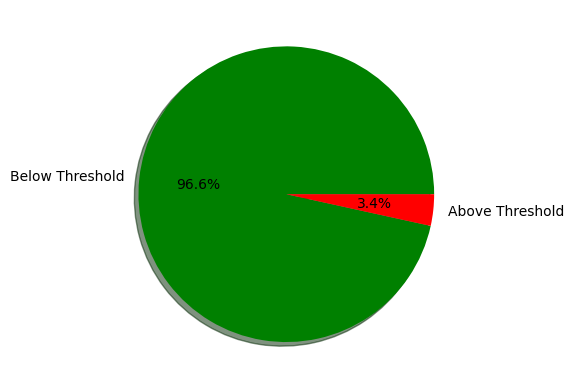

In [41]:
v_pie_labels = ['Below Threshold', 'Above Threshold']
v_blw_thrs = float(len(df) - len(df_great)) / 100
v_abv_thrs = float(len(df_great)) / 100
v_array_thrs = [v_blw_thrs, v_abv_thrs]

fig, ax = plt.subplots()
ax.pie(v_array_thrs,
       labels=v_pie_labels,
       colors=['green', 'red'],
       autopct='%1.1f%%',
       shadow=True)

### 4. CPU, Memory, and Disk Usage

#### Overall Average 10 MySQL Databases in January, 2024

In [7]:
df_gb = df.groupby([df.Date.dt.month, df.Name, df.Type])['Usage'].mean().round(2)
df_gb.to_frame()

Usage
Date Name      Type         
1    Chat      CPU      0.25
               Disk     0.90
               Memory   0.12
     Collect   CPU      0.22
               Disk     0.36
               Memory   0.30
     Credit2   CPU      0.18
               Disk     0.41
               Memory   0.38
     Credit4   CPU      0.06
               Disk     0.23
               Memory   0.46
     DX        CPU      0.34
               Disk     0.46
               Memory   0.11
     Disburse2 CPU      0.10
               Disk     0.55
               Memory   0.82
     Disburse4 CPU      0.12
               Disk     0.13
               Memory   0.09
     Profile   CPU      0.09
               Disk     0.08
               Memory   0.06
     SMS       CPU      0.00
               Disk     0.08
               Memory   0.13
     Six       CPU      0.27
               Disk     0.65
               Memory   0.08

#### 4.1 CPU Usage

In [6]:
df_CPU = df[df['Type'] == 'CPU']
df_CPU.head()

,Date,Name,Type,Usage,Threshold
0,2024-01-01,Disburse4,CPU,0.03,0.85
1,2024-01-02,Disburse4,CPU,0.24,0.85
2,2024-01-03,Disburse4,CPU,0.23,0.85
3,2024-01-04,Disburse4,CPU,0.03,0.85
4,2024-01-05,Disburse4,CPU,0.03,0.85


In [8]:
df_CPU_gb = df_CPU.groupby([df_CPU.Date.dt.month, df_CPU.Name])['Usage'].mean().round(2)
df_CPU_gb.to_frame()

Usage
Date Name            
1    Chat        0.25
     Collect     0.22
     Credit2     0.18
     Credit4     0.06
     DX          0.34
     Disburse2   0.10
     Disburse4   0.12
     Profile     0.09
     SMS         0.00
     Six         0.27

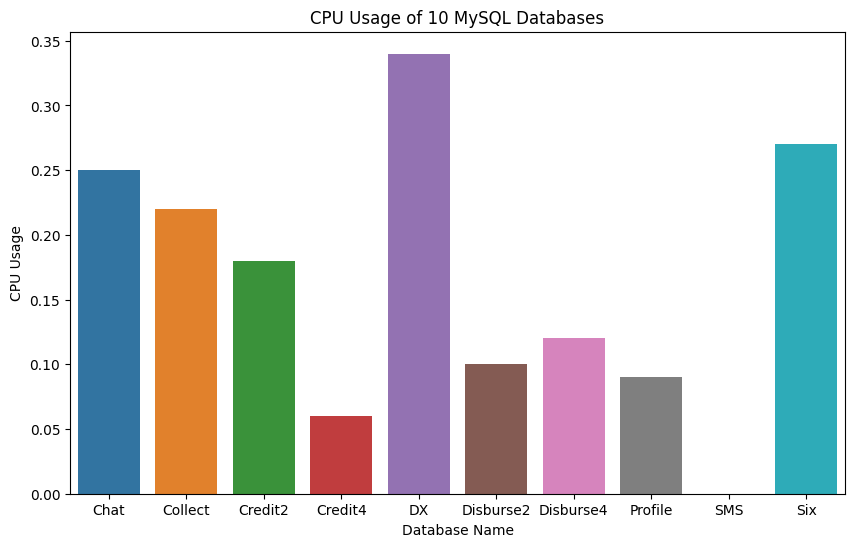

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Usage', hue='Name', data=df_CPU_gb.to_frame().reset_index())

#plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Database Name')
plt.ylabel('CPU Usage')
plt.title('CPU Usage of 10 MySQL Databases')

plt.show()

Conclusion, the CPU usage of all 10 MySQL databases are below threshold which is 85% or 0.85. The highest CPU usage in the graph above is Chat and the lowest(or it feels like no activity at all) is SMS.

#### 4.2 Memory Usage

In [18]:
df_Mem = df[df['Type'] == 'Memory']
df_Mem.head()

,Date,Name,Type,Usage,Threshold
31,2024-01-01,Disburse4,Memory,0.08,0.85
32,2024-01-02,Disburse4,Memory,0.09,0.85
33,2024-01-03,Disburse4,Memory,0.09,0.85
34,2024-01-04,Disburse4,Memory,0.09,0.85
35,2024-01-05,Disburse4,Memory,0.08,0.85


In [19]:
df_Mem_gb = df_Mem.groupby([df_Mem.Date.dt.month, df_Mem.Name])['Usage'].mean().round(2)
df_Mem_gb.to_frame()

Usage
Date Name            
1    Chat        0.12
     Collect     0.30
     Credit2     0.38
     Credit4     0.46
     DX          0.11
     Disburse2   0.82
     Disburse4   0.09
     Profile     0.06
     SMS         0.13
     Six         0.08

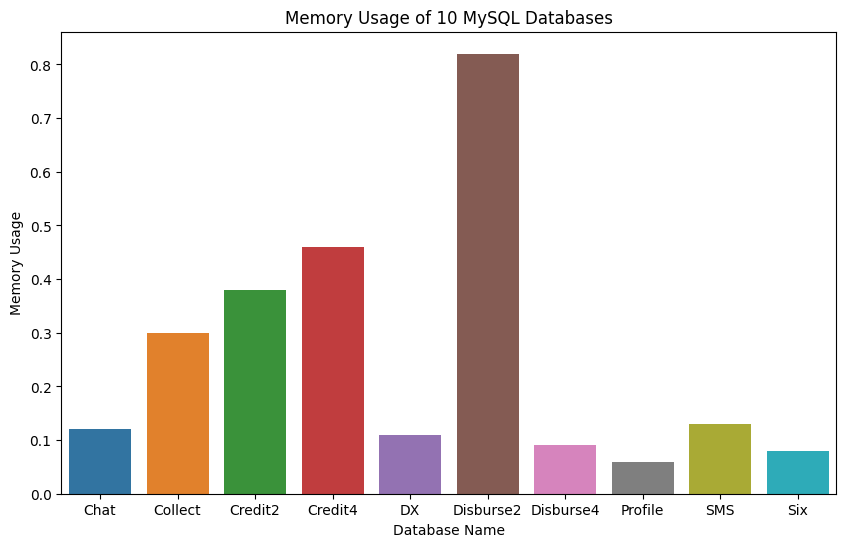

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Usage', hue='Name', data=df_Mem_gb.to_frame().reset_index())

#plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Database Name')
plt.ylabel('Memory Usage')
plt.title('Memory Usage of 10 MySQL Databases')

plt.show()

Conclusion, the memory usage of all 10 MySQL databases are below threshold which is 85% or 0.85. The highest memory usage in the graph above is Disburse2 and the lowest is Profile.

#### 4.3 Disk Usage

In [21]:
df_Disk = df[df['Type'] == 'Disk']
df_Disk.head()

,Date,Name,Type,Usage,Threshold
62,2024-01-01,Disburse4,Disk,0.13,0.85
63,2024-01-02,Disburse4,Disk,0.13,0.85
64,2024-01-03,Disburse4,Disk,0.13,0.85
65,2024-01-04,Disburse4,Disk,0.13,0.85
66,2024-01-05,Disburse4,Disk,0.13,0.85


In [22]:
df_Disk_gb = df_Disk.groupby([df_Disk.Date.dt.month, df_Disk.Name])['Usage'].mean().round(2)
df_Disk_gb.to_frame()

Usage
Date Name            
1    Chat        0.90
     Collect     0.36
     Credit2     0.41
     Credit4     0.23
     DX          0.46
     Disburse2   0.55
     Disburse4   0.13
     Profile     0.08
     SMS         0.08
     Six         0.65

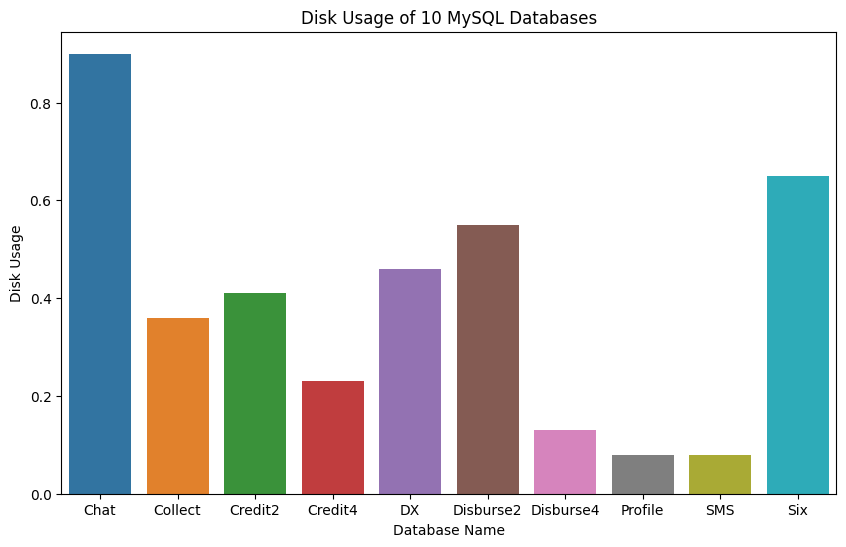

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Usage', hue='Name', data=df_Disk_gb.to_frame().reset_index())

#plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Database Name')
plt.ylabel('Disk Usage')
plt.title('Disk Usage of 10 MySQL Databases')

plt.show()

Conclusion, the highest disk usage in the graph above is Chat with 90% or 0.90 and the lowest are Profile and SMS.

### Conclusion

Overall, both CPU and memory usage are below threshold which is 85% or 0.85. But, the disk usage of Chat's database is above threshold, which is 90%.